# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
#creating database connection
conn = sqlite3.connect('mydatabase.db')

#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,0.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,0.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,0.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,0.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,0.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
df.to_csv('vendor_summary.csv', index=False)


In [4]:
import os
print(os.getcwd())


C:\Users\Rishi\Documents


## Exploratory Data Analysis

Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column.  
This will help us:  
- Understand data patterns  
- Identify anomalies  
- Ensure data quality before proceeding with further analysis

In [5]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,0.000000e+00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000e+00


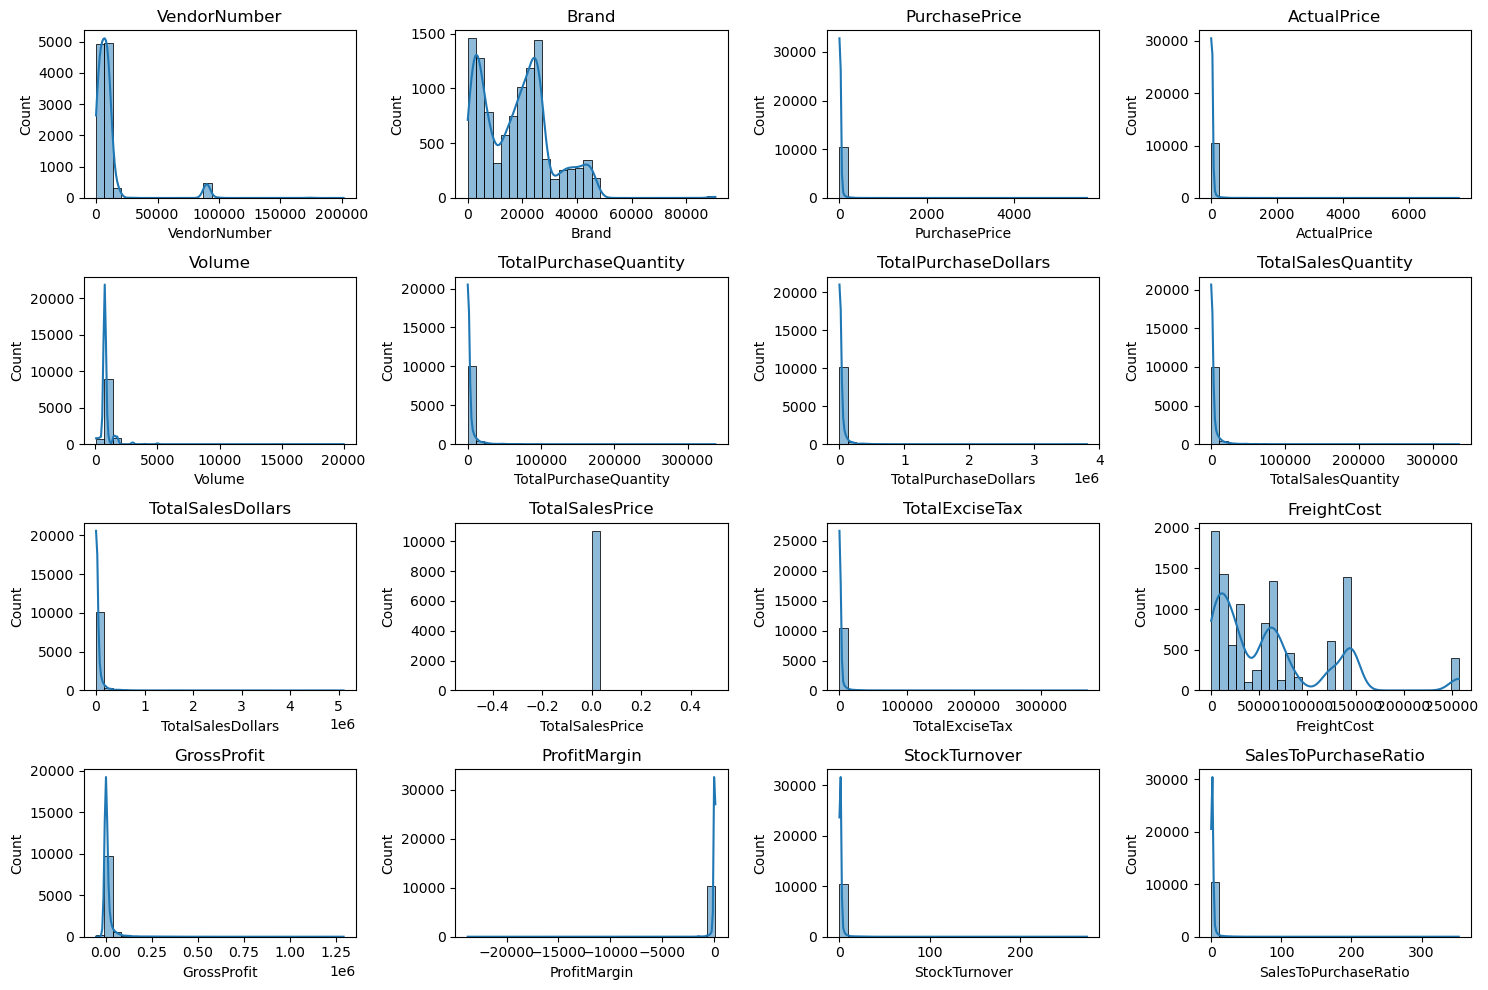

In [6]:
#Distribution Plots for Numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)#Adjust grid layout as needed
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

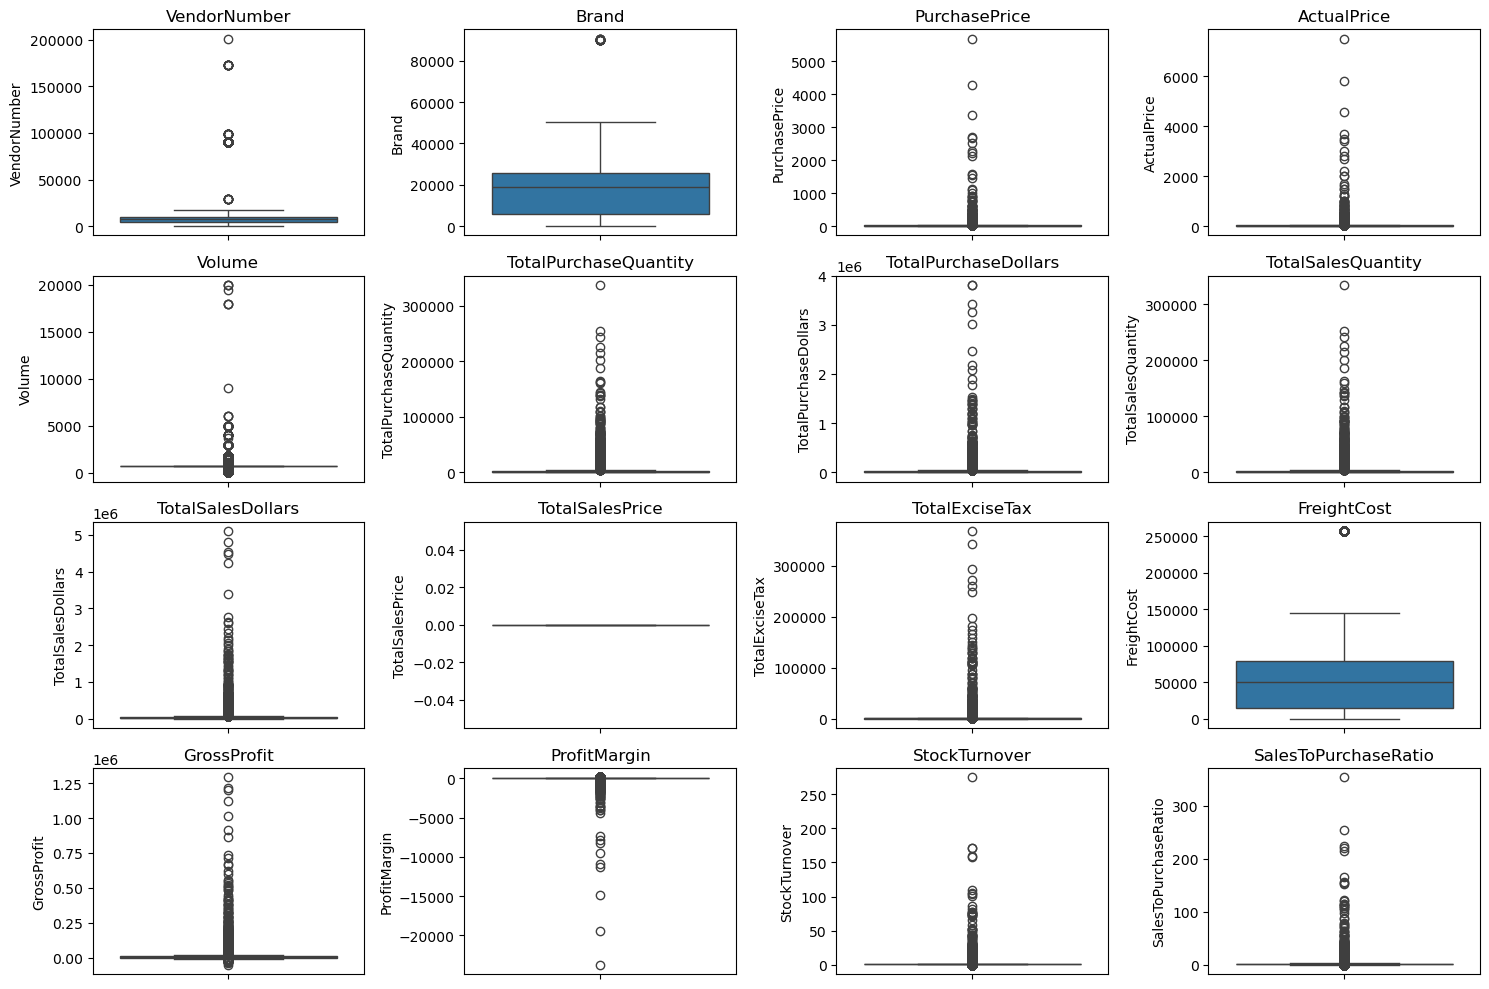

In [7]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)#Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Summary Statistics Insights

### Negative & Zero Values
- *Gross Profit: Minimum value is **-52,002.78*, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.  
- *Profit Margin*: Minimum is negative, which suggests cases where revenue is zero or even lower than costs.  
- *Total Sales Quantity & Sales Dollars*: Minimum values are 0, meaning some products were purchased but never sold — these could be slow-moving or obsolete stock.

### Outliers Indicated by High Standard Deviations
- *Purchase & Actual Prices: Maximum values (5,681.81* & *7,499.99) are significantly higher than the mean (24.39* & *35.64*), indicating potential premium products.  
- *Freight Cost: Huge variation, from **0.09* to *257,032.07*, suggests logistics inefficiencies or bulk shipments.  
- *Stock Turnover: Ranges from **0* to *274.5*, implying some products sell extremely fast while others remain in stock indefinitely.  
  - A value greater than 1 indicates that the sold quantity for that product is higher than the purchased quantity — possibly due to sales being fulfilled from older stock.

In [8]:
#let's filter the data by removing incosistencies
df= pd.read_sql_query("""select *
from vendor_sales_summary
where GrossProfit >0
and ProfitMargin >0
and TotalSalesQuantity >0""",conn)

In [9]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,0.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,0.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,0.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,0.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,0.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,4.99,750.0,2,2.64,5.0,15.95,0.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,0.39,0.49,50.0,6,2.34,134.0,65.66,0.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,0.99,50.0,2,1.48,2.0,1.98,0.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,1.99,200.0,1,1.47,72.0,143.28,0.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388


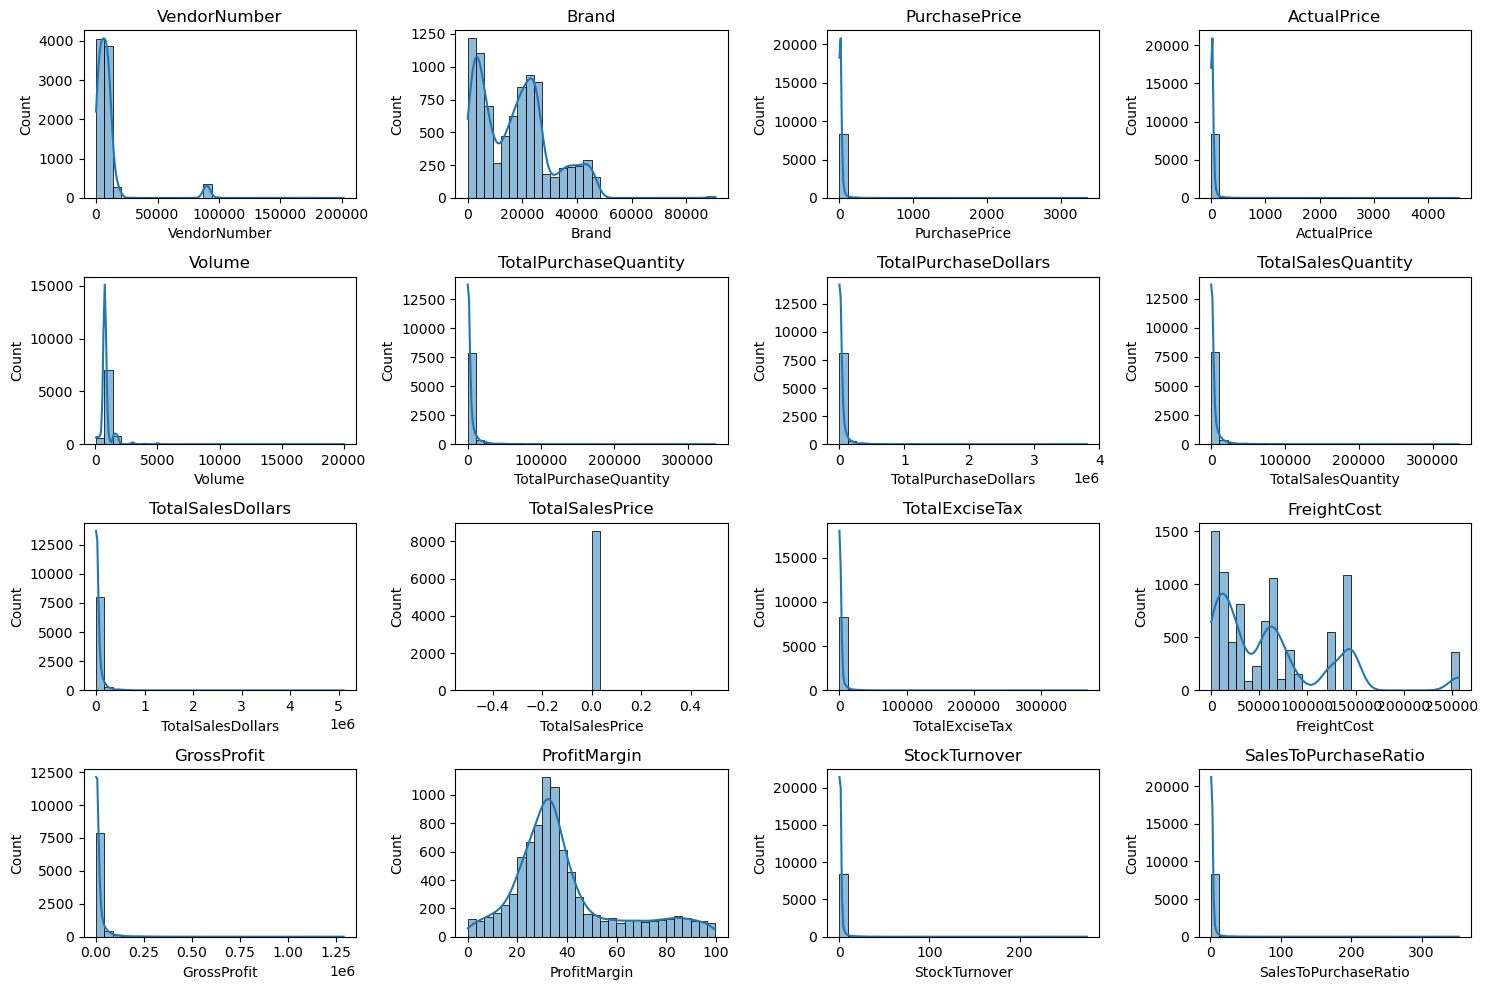

In [10]:
#Distribution Plots for Numerical columns after removing inconsistency
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)#Adjust grid layout as needed
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

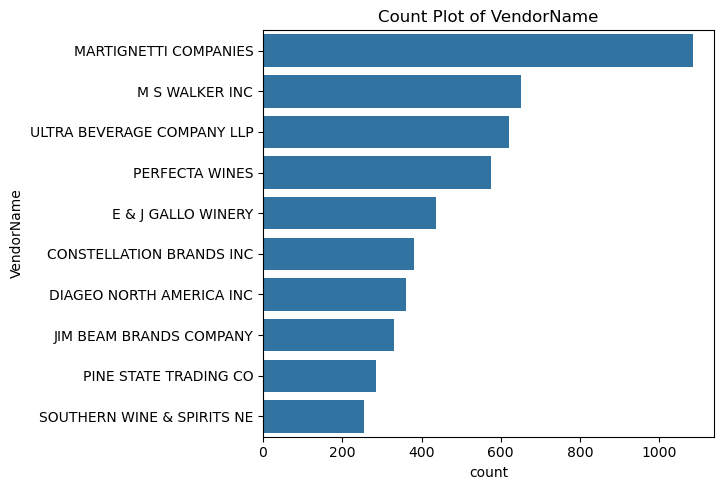

In [11]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()

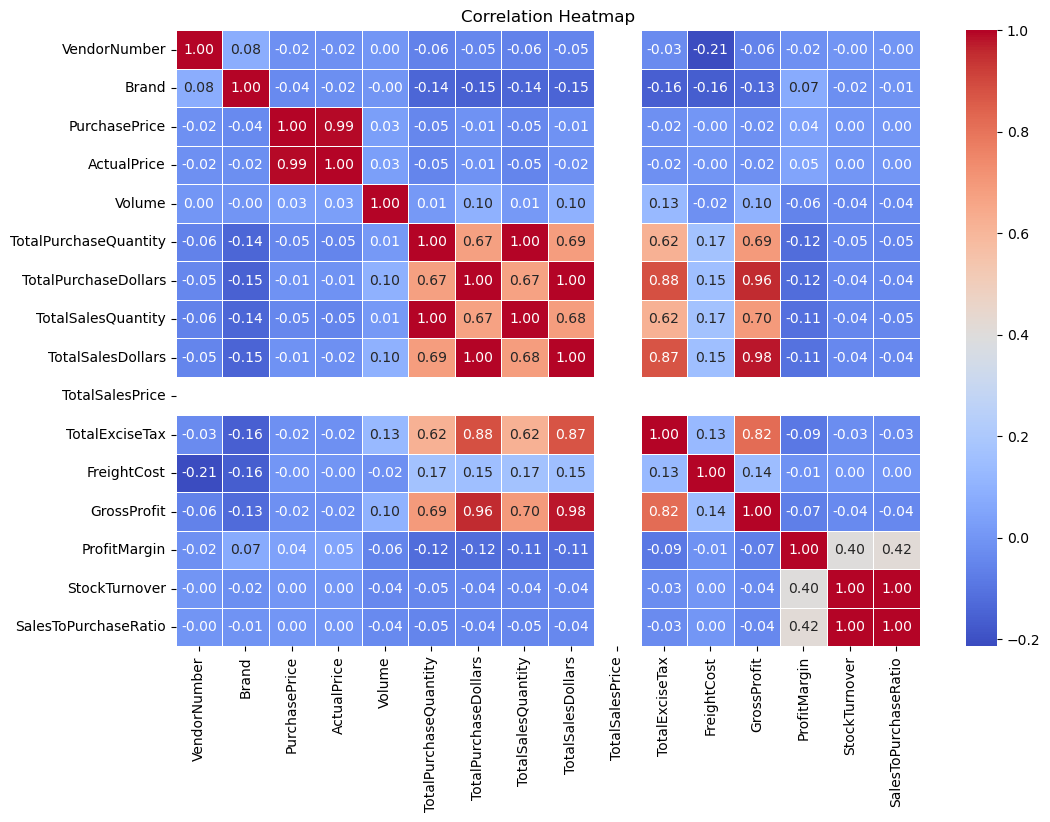

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))

correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

## Correlation Insights

- *Purchase Price* has weak correlations with *Total Sales Dollars* (-0.012) and *Gross Profit* (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.  

- *Total Purchase Quantity* and *Total Sales Quantity* show a strong correlation (0.999), confirming efficient inventory turnover.  

- *Profit Margin* has a negative correlation with *Total Sales Price* (-0.179), suggesting that as sales price increases, margins decrease — possibly due to competitive pricing pressures.  

- *Stock Turnover* has weak negative correlations with both *Gross Profit* (-0.038) and *Profit Margin* (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysis

#### Identify the brands which needs promotional or pricing adjustment which exhibits lower sales performance but higher profit margins

In [13]:
# Brand performance aggregation
brand_performance = df.groupby('VendorName').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

# Thresholds
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.15)

In [14]:
low_sales_threshold

13589.507999999998

In [15]:
high_margin_threshold

25.51983969688537

In [16]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,VendorName,TotalSalesDollars,ProfitMargin
107,UNCORKED,176.94,32.892506
16,CAPSTONE INTERNATIONAL,246.87,77.866894
33,FANTASY FINE WINES CORP,327.59,60.731402
85,SILVER MOUNTAIN CIDERS,342.51,77.466351
44,"IRA GOLDMAN AND WILLIAMS, LLP",665.82,71.331591
0,ADAMBA IMPORTS INTL INC,704.53,36.672675
35,FLAVOR ESSENCE INC,1474.41,98.846996
3,AMERICAN SPIRITS EXCHANGE,1511.16,38.187882
9,BLACK ROCK SPIRITS LLC,2049.18,43.777511
60,MILTONS DISTRIBUTING CO,2249.64,36.093779


In [17]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000]

Text(0, 0.5, 'Profit Margin (%)')

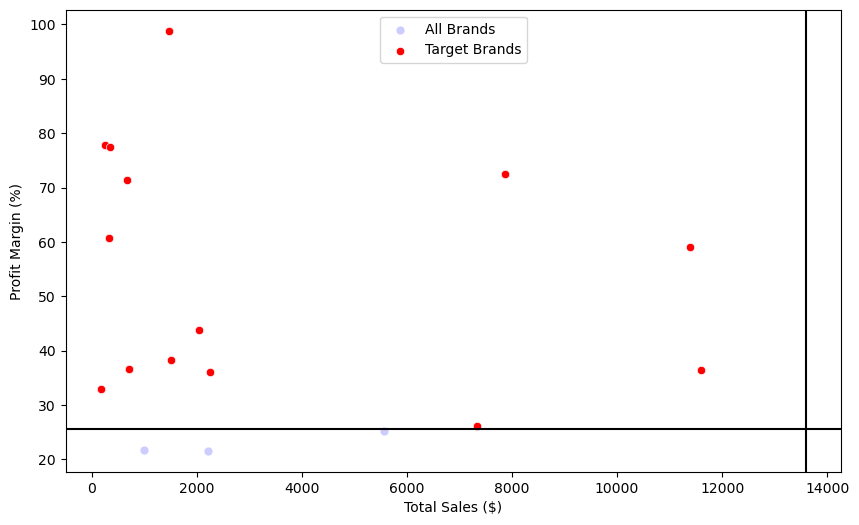

In [18]:
plt.figure(figsize=(10, 6))

# Scatter plot for all brands
sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="blue",
    label="All Brands",
    alpha=0.2
)

# Scatter plot for target brands
sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="red",
    label="Target Brands"
)

# Threshold lines
plt.axhline(high_margin_threshold, linestyle='-', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='-', color='black', label="Low Sales Threshold")

# Labels and formatting
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")


#### Which vendors and brands demonstrate the highest sales performance?


In [19]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)


In [20]:
# Top Vendors & Brands by Sakes Performance

top_vendors = df.groupby("VendorName") ["TotalSalesDollars"].sum().nlargest (10)

top_vendors


VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [21]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

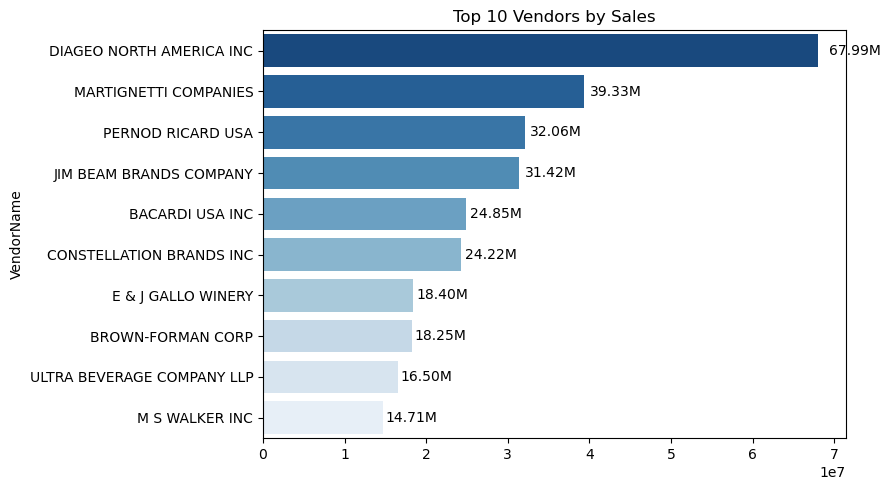

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: top_vendors is a Series or dict-like structure
# top_vendors = your_data

plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

# Add labels to bars
for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

#### Which vendors contribute the most to total purchase dollars?

In [23]:
vendor_performance=df.groupby('VendorName').agg({'TotalPurchaseDollars':'sum',
                             'TotalSalesDollars':'sum',
                             'GrossProfit':'sum'}).reset_index()

In [24]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [25]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [26]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors ['TotalSalesDollars'] = top_vendors ['TotalSalesDollars'].apply(format_dollars)
top_vendors ['TotalPurchaseDollars'] = top_vendors ['TotalPurchaseDollars'].apply(format_dollars)
top_vendors ['GrossProfit'] = top_vendors ['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,TotalSalesDollars,GrossProfit,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,16.30
57,MARTIGNETTI COMPANIES,25.50M,39.33M,13.83M,8.30
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.64
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.67
20,CONSTELLATION BRANDS INC,15.27M,24.22M,8.95M,4.97
11,BROWN-FORMAN CORP,13.24M,18.25M,5.01M,4.31
30,E & J GALLO WINERY,12.07M,18.40M,6.33M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,16.50M,5.34M,3.63
53,M S WALKER INC,9.76M,14.71M,4.94M,3.18


In [27]:
top_vendors['Cumulative_Contribution']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,TotalSalesDollars,GrossProfit,PurchaseContribution%,Cumulative_Contribution
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,39.33M,13.83M,8.30,24.60
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.64,40.00
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,24.22M,8.95M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,18.25M,5.01M,4.31,54.95
30,E & J GALLO WINERY,12.07M,18.40M,6.33M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,16.50M,5.34M,3.63,62.51
53,M S WALKER INC,9.76M,14.71M,4.94M,3.18,65.69


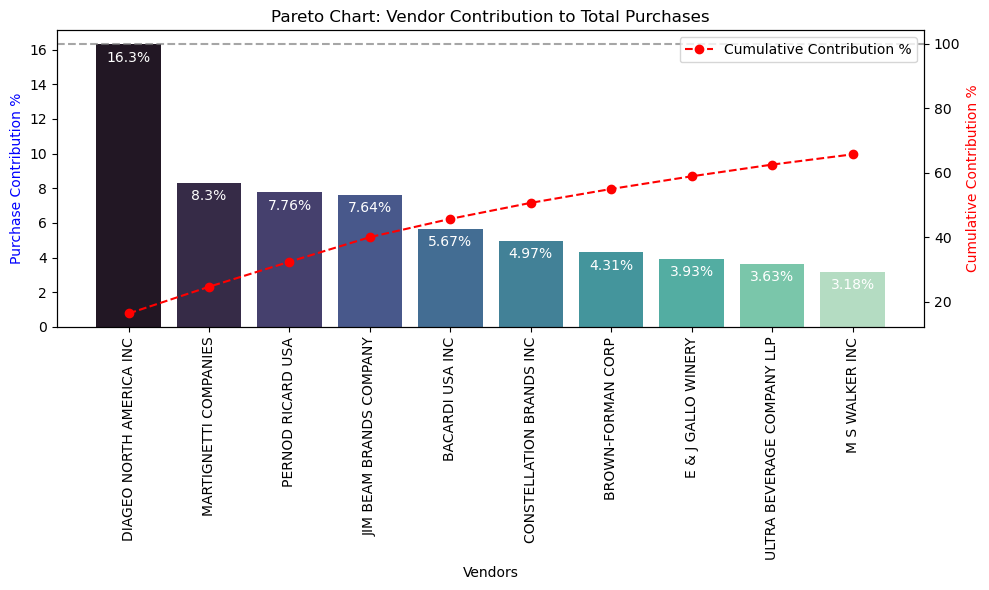

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: top_vendors is a DataFrame
# Make sure columns: VendorName, Purchase_Contributions, Purchase_Contribution%, Cumulative_Contribution%

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contributions
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseContribution%'],
    palette="mako",
    ax=ax1
)

# Add percentage labels on bars
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution %'
)

# Formatting
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Horizontal reference line
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)

# Legend for cumulative contribution line
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

#### How much of total procurement is dependent on the top vendors

In [29]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 65.69 %


Total Purchase Contribution of top 10 vendors is 65.69 %


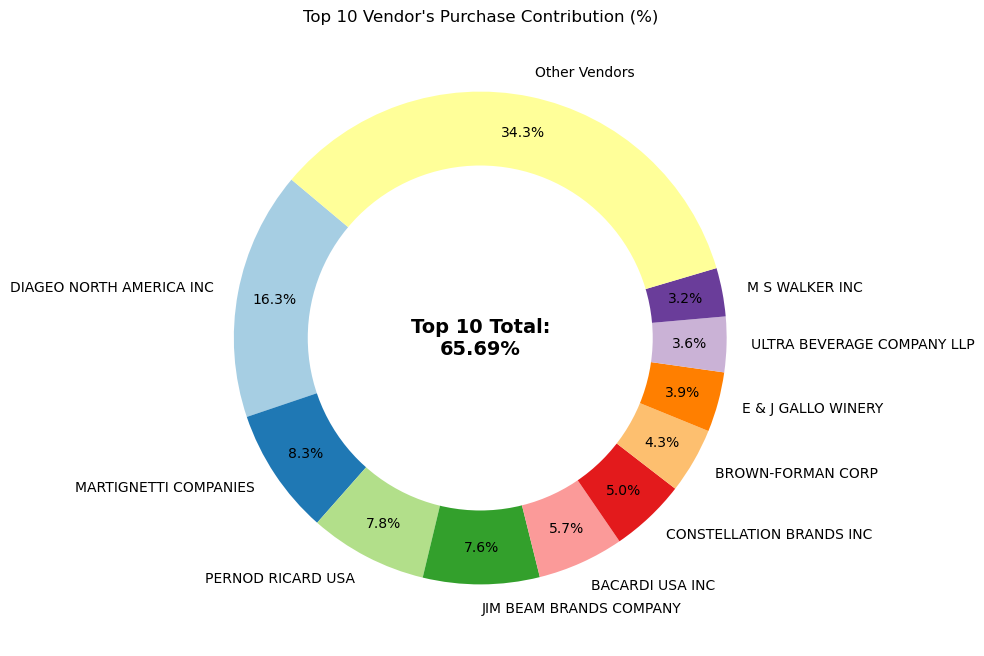

In [30]:
# Calculate values
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Print total contribution statement
print(f"Total Purchase Contribution of top 10 vendors is {total_contribution:.2f} %")

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

# Title
plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for the cost savings?


In [31]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [32]:
df['OrderSize']=pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=["Small","Medium","Large"])

In [33]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


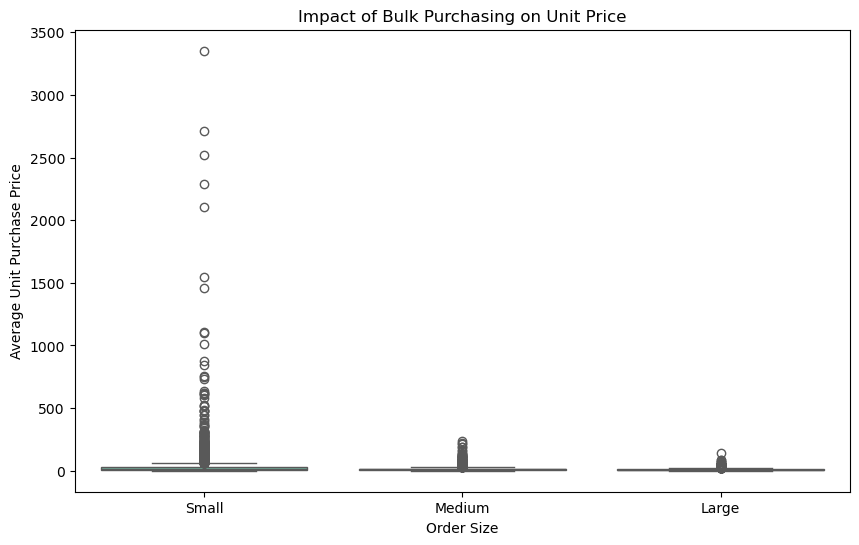

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

## Bulk Purchase Impact on Pricing and Margins

- *Large Order Size* vendors get the lowest unit price: $10.78 per unit, meaning higher margins if inventory is managed efficiently.  
- *Price difference* between *Small* and *Large* orders: *-72%* (substantial reduction in unit cost).  
- This suggests that *bulk pricing strategies* successfully encourage vendors to purchase in larger volumes, leading to *higher total sales* despite lower per-unit revenue.

# Which vendors have low inventory turnover , indicating excess stock and slow-moving products?

In [35]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


### How much capital is locked in unsold inventory per vendor and which vendors contribute the most of it?

In [36]:
# Calculate Unsold Inventory Value
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]

# Print the total unsold capital
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.71M


In [37]:
 # Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)

# Format the values as currency
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)

# Display top 10 vendors
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### What is the 95% confidence intervals for profit margins of top-performing and low performing vendors.

In [38]:
# Calculate thresholds
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Get profit margins for top and low vendors
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [39]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [40]:
low_vendors



5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [41]:
import numpy as np
from scipy import stats
def confidence_interval(data, confidence=0.95):
    # Mean of the data
    mean_val = np.mean(data)
    
    # Standard error
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    
    # t-critical value
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    
    # Margin of error
    margin_of_error = t_critical * std_err
    
    # Return mean and confidence interval
    return mean_val,mean_val-margin_of_error,mean_val+margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


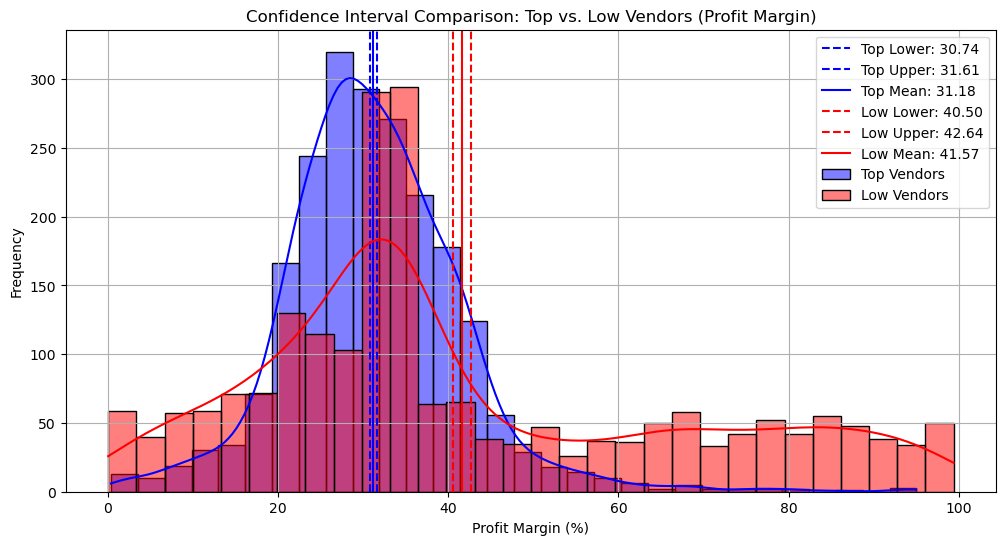

In [42]:
# Calculate confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print results
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plot
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### Confidence Interval Analysis: Top vs. Low-Performing Vendors

- *Low-Performing Vendors*  
  - *95% Confidence Interval:* 40.48% to 42.62%  
  - Tend to maintain *higher profit margins* compared to top vendors.  
  - Possible reasons:
    - Premium pricing
    - Lower operational costs
    - Niche or specialized products

- *High-Performing Vendors*  
  - *95% Confidence Interval:* 30.74% to 31.61%  
  - Maintain lower margins despite higher sales volumes.  
  - Possible improvement strategies:
    - Selective price adjustments
    - Cost optimization
    - Bundling or value-added services

*Interpretation:*  
- Low-performing vendors have *higher profitability per unit* but struggle with *sales volume* — may need stronger marketing, competitive pricing, or better distribution.  
- High-performing vendors prioritize *volume over margin, but could boost profitability through **strategic pricing and cost control*.

### Hypothesis Testing: Profit Margin Difference

*Research Question:*  
Is there a significant difference in profit margins between top-performing and low-performing vendors?

---

*Hypotheses:*

- *H₀ (Null Hypothesis):*  
  There is *no significant difference* in the mean profit margins of top-performing and low-performing vendors.  
  \[
  \mu_{\text{top}} = \mu_{\text{low}}
  \]

- *H₁ (Alternative Hypothesis):*  
  The mean profit margins of top-performing and low-performing vendors are *significantly different*.  
  \[
  \mu_{\text{top}} \neq \mu_{\text{low}}
  \]

---

*Test Type:*  
Two-sample *t-test* (independent samples)

*Significance Level (α):*  
0.05 (95% confidence level)

---

In [43]:
from scipy.stats import ttest_ind

# Define thresholds
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Separate top and low performing vendors
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test (Welch's t-test, unequal variances)
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


In [52]:
df.to_csv("vendor_sales_summary.csv", index=False)

In [50]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,0.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,0.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large,87913.29
2,17035,PERNOD RICARD USA,8068,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,0.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,0.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,0.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large,49712.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,4.99,750.0,2,2.64,5.0,15.95,0.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,Small,-3.96
8560,8004,SAZERAC CO INC,5683,0.39,0.49,50.0,6,2.34,134.0,65.66,0.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small,-49.92
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,0.99,50.0,2,1.48,2.0,1.98,0.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small,0.00
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,1.99,200.0,1,1.47,72.0,143.28,0.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small,-104.37
